In [83]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import pandas as pd
import random

from IPython.display import HTML, display
#import tabulate

def PrintXL(*arg):
    html="<span style='font-size: 22px;font-weight:700'>"
    for a in arg:
        html += str(a)
    html +="</span>"
    display(HTML(html))
    
def PrintL(*arg):
    html="<span style='font-size: 18px;font-weight:700'>"
    for a in arg:
        html += str(a)
    html +="</span>"
    display(HTML(html))
    
def PrintM(*arg):
    html="<span style='font-size: 14px;font-weight:500'>"
    for a in arg:
        html += str(a)
    html +="</span>"
    display(HTML(html))

def BigTitle(title):
    html="<div style='width: 100%; padding-bottom: 10px'><span style='font-size: 22px;font-weight:700'>" + title + "</span>"
    html +="</div>"
    display(HTML(html))
    
def EasyRead(title,text):
    html="<div style='width: 100%; padding-bottom: 10px'><span style='font-weight:700'>" + title + ":</span> &nbsp;&nbsp;"
    if type(text) is str:
        html += text
    elif type(text) is int:
        html += str(text)
    elif type(text) is float:
        html += str(round(text,5))
    else:
        html += "[ "
        for t in text:
            if type(t) is int:
                t = float(t)
            if type(t) is list:
                html += " [ "
                for tt in t:
                    html += str(round(tt,5)) + " &nbsp; "
                html += "] &nbsp; "
            else:
                html += str(round(t,5)) + " &nbsp; "
        html += " ] "
        
    html +="</div>"
    display(HTML(html))


### What's going on?
Create range of #'s from -100->100 for X<br>
Create range of #'s from -200->200 for R (why not Y?)<br>
<br>
#### Variables
X: X-axis points<br>
R: Y-axis points<br>
EPS: Epochs. One epoch is one forward pass AND one backward pass of all the training examples<br>
<br>
#### Numpy
X=X.reshape(-1,1)   
    This will reshape the matrix to a new format<br>
    -1 simply means that it is an *unknown dimension* and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the criteria.<br>
    Example:
    <img src="./files/reshape.png">
    
                

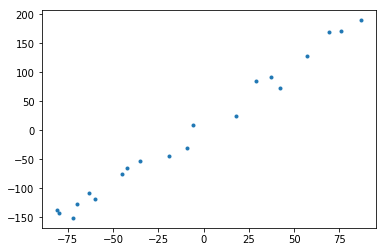

In [3]:
RANGE = 100
COUNT = 20
EPS = 50

# create function that takes x and outputs 2x+10
F_x = lambda x: 2*x + 10
# create an array with values -RANGE->RANGE with COUNT examples
X = np.array([random.randint(-RANGE,RANGE) for i in range(COUNT)])
#print(np.sort(X));
R = np.array([F_x(x)+random.random()*EPS-EPS/2 for x in X])
#print(np.sort(R));

X=X.reshape(-1,1)
R=R.reshape(-1,1)

plt.plot(X,R, '.')
plt.show()

## Hypothesis Function
<img src="./files/hypothesis.png">

## Cost Function
<img src="./files/costfunc.png">

### numpy.cov
<img src="./files/numpycov.png">
<br><br>

### numpy.append
<img src="./files/numpyappend.png">
<br><br>

### numpy.transpose
<img src="./files/numpytranspose.png">
<br><br>

### matrix multiplication reminder
<img src="./files/matrixmult.png">
<br><br>

### multiplicative inverse
<img src="./files/inv.png">
<br><br>


### matrix transpose
<img src="./files/transpose.png">
<br><br>

### dot product
<img src="./files/dot.png">
<br><br>

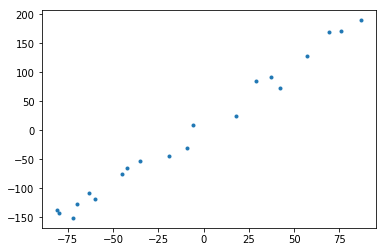

In [88]:
from numpy.linalg import inv 
from numpy import dot, transpose

# to array X append ones, along axis 1
X_1 = np.append(X,np.ones([len(X),1]),1)
#print (X_1)


################
# 

PrintXL("original was:<br>   W = (dot  (  inv(dot(transpose(X_1), X_1)), dot(transpose(X_1), R)  )  )")
PrintM("We are going to break it down to see what is going on.<br><br>")
PrintL("dotX1_R = dot(transpose(X_1), R)")
PrintM("This dot product is matrix multiplication of X1 and R.")
PrintM("Matrix multiplication requires dimensions of (m,n) and (n,1) and will have shape of (m,1)")
PrintM("Shape of X1 and R: ", X_1.shape, " ", R.shape)
PrintM("It currently does not meet the requirement.\n")
transX1 = transpose(X_1)
(m,n) = transX1.shape
PrintM("Shape of transposed_X1 and R: ", transX1.shape, " ", R.shape)
PrintM("This meets the requirements.")
PrintM("Now we expect an output shape of ", m, ",", 1)
dotX1_R = dot(transX1,R)
PrintM("The dot product shape of transposed_X1 and R: ", dotX1R.shape, " Perfect!")
print("\n\n")

PrintL("invDotTX1_X1 = inv(dot(transpose(X_1), X_1))")
PrintM("Now we need the dot product of transX1 and X1")
PrintM("The shapes are: ", transX1.shape,',',X_1.shape)
dotTX1_X1=dot(transpose(X_1), X_1)
PrintM("Result shape: ", dotTX1_X1.shape)
PrintM("Then we'll take the multiplicative inverse of that table with inv()")
invDotTX1_X1 = inv(dotTX1_X1)
PrintL("W = dot  (invDotTX1_X1, dotX1_R)  ")
PrintM("Final shape of W: ", W.shape)



RuntimeError: matplotlib does not support generators as input

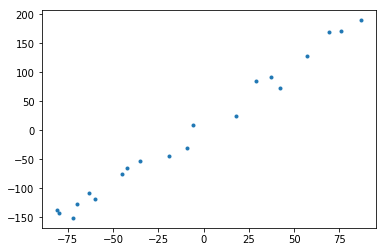

In [92]:
PrintL("Set Weights:")
PrintM("Set theta (weights) to (W[1],W[0]): ", W[1], W[0])
theta = (W[1],W[0])


H_x = lambda x: theta[0] + theta[1]*x

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)


plt.plot(X_plt, Y_plt)

In [ ]:




from numpy.linalg import lstsq
print(lstsq(X_1, R)[0])

In [ ]:
theta = (0,0)
#theta=(10,2)
print (theta)
Y = map(H_x, X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
plt.plot(X_plt, Y_plt)

In [ ]:
alpha = 0.0001
print (theta)

w0Grad = -2*sum(R-H_x(X))/len(X)
w1Grad = -2*sum( (R-H_x(X))*X )/len(X)

print ("Gradient: ", w0Grad, w1Grad)
theta = theta[0]-alpha*w0Grad, theta[1]-alpha*w1Grad
print ("Theta: ", theta)

Y = H_x(X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
plt.plot(X_plt, Y_plt)

In [ ]:
rate = 0.0001
#rate = 1
X = np.array([ [1, 2, 3], [1,3,4], [1,4,5] , [1,5,6] , [1,6,7], [1,8,9]])
c = [1, 2, 3]
R = np.array([14, 19, 24, 29, 34, 44])
w = np.array([0,0,0])
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Derivative: ", sum(w*x), -2*(r-sum(w*x)))
    g = g + (-2*(r-sum(w*x)) * x)
    e = e + (r-sum(w*x))**2
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = (r-sum(w1*x))**2
print ("Revised Error: ", e/len(X))
iterations = 1

In [ ]:
wF = [ 0.43322452,  2.30207072,  2.73529524]  #50 iterations
w = w1
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Derivative: ", sum(w*x), -2*(r-sum(w*x)))
    g = g + (-2*(r-sum(w*x)) * x)
    e = e + (r-sum(w*x))**2
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = (r-sum(w1*x))**2
print ("Revised Error: ", e/len(X))
iterations = iterations + 1
print ("Iterations: ", iterations)

In [ ]:
wF = [ 0.06315024,  0.33956832,  0.40271856]
wF = [ 0.43322452,  2.30207072,  2.73529524]  #50 iterations
pX = [x for (a,x,y) in X ]
pY = R
plt.axis([0,10, 0, 50])
plt.plot(pX, pY, "ko")
wFun = lambda ws, p: (wF[0]+wF[1]*p[1]+wF[2]*p[2])
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

0.5
0.9999546021312976
4.5397868702434395e-05
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [4.5397868702434395e-05, 0.00012339457598623172, 0.0003353501304664781, 0.0009110511944006454, 0.0024726231566347743, 0.0066928509242848554, 0.01798620996209156, 0.04742587317756678, 0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153, 0.9975273768433653, 0.9990889488055994, 0.9996646498695336, 0.9998766054240137]


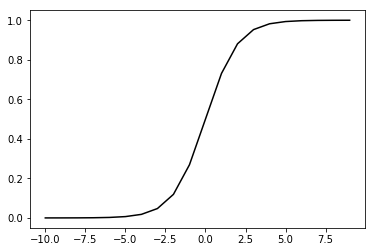

In [94]:
import math
sigmoid = lambda y: 1.0/(1+math.exp(-y))
print (sigmoid(0))
print (sigmoid(10))
print (sigmoid(-10))

slog = lambda x: 0 if x==0 else math.log(x)
CrossEntropy = lambda r, y: -1*(r*slog(y) + (1-r)*slog(1-y))

pX = [x for x in range(-10,10)]
pY = [sigmoid(x) for x in range(-10,10) ]
print (pX, pY)
plt.plot(pX, pY, "k-")

In [103]:
rate = 0.020
#rate = 1
X = np.array([ [1, 2, 3], [1,3,4], [1,4,5] , [1,5,6] , [1,6,7], [1,8,9]])
R = np.array([0, 0, 0, 1, 1, 1])
w = np.array([0,0,0])
g = np.array([0,0,0])
e = 0

for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print('w*x', w*x)
    print ("Y, Sigmoid(Y), Derivative: ", sum(w*x), sigmoid(sum(w*x)), -(r-sigmoid(sum(w*x))) )
    g = g + (-(r-sigmoid(sum(w*x))) * x)
    e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    print("e: ",e)
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = e + CrossEntropy(r, sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
iterations = 1

input:  [1 2 3]
required output:  0
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 0.5
e:  0.6931471805599453
gradient:  [0.5 1.  1.5]
input:  [1 3 4]
required output:  0
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 0.5
e:  1.3862943611198906
gradient:  [1.  2.5 3.5]
input:  [1 4 5]
required output:  0
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 0.5
e:  2.0794415416798357
gradient:  [1.5 4.5 6. ]
input:  [1 5 6]
required output:  1
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 -0.5
e:  2.772588722239781
gradient:  [1. 2. 3.]
input:  [1 6 7]
required output:  1
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 -0.5
e:  3.4657359027997265
gradient:  [ 0.5 -1.  -0.5]
input:  [1 8 9]
required output:  1
w*x [0 0 0]
Y, Sigmoid(Y), Derivative:  0 0.5 -0.5
e:  4.1588830833596715
gradient:  [ 0. -5. -5.]
[ 0.         -0.83333333 -0.83333333]
Error:  0.6931471805599453
[0.  0.1 0.1]
Revised Error:  0.6690911193553902


In [ ]:
wF = [ 0. ,        -0.83333333, -0.83333333]
wF = [-0.65004852,  0.46679243, -0.18325608]
wF = [-1.30847755,  0.88594056, -0.42253699] # 100 iterations
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,20, -20, 20])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(wF*x), sigmoid(sum(wF*x)) )


In [99]:
rate = 0.02
print (w1)
w=w1
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print('w: ',w)
    print ("required output: ", r)
    print ("Y, Derivative: ", sigmoid(sum(w*x)), -(r-sigmoid(sum(w*x))) )
    g = g + (-(r-sigmoid(sum(w*x))) * x)
    e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = e + CrossEntropy(r,sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
iterations = iterations + 1
print ("Iterations:  ", iterations)

[-0.02766453  0.05352263  0.02585811]
input:  [1 2 3]
w:  [-0.02766453  0.05352263  0.02585811]
required output:  0
Y, Derivative:  0.5391584084322553 0.5391584084322553
gradient:  [0.53915841 1.07831682 1.61747523]
input:  [1 3 4]
w:  [-0.02766453  0.05352263  0.02585811]
required output:  0
Y, Derivative:  0.5588104671220999 0.5588104671220999
gradient:  [1.09796888 2.75474822 3.85271709]
input:  [1 4 5]
w:  [-0.02766453  0.05352263  0.02585811]
required output:  0
Y, Derivative:  0.5782799857646523 0.5782799857646523
gradient:  [1.67624886 5.06786816 6.74411702]
input:  [1 5 6]
w:  [-0.02766453  0.05352263  0.02585811]
required output:  1
Y, Derivative:  0.5975091598973378 -0.40249084010266223
gradient:  [1.27375802 3.05541396 4.32917198]
input:  [1 6 7]
w:  [-0.02766453  0.05352263  0.02585811]
required output:  1
Y, Derivative:  0.6164430932673464 -0.38355690673265364
gradient:  [0.89020111 0.75407252 1.64427363]
input:  [1 8 9]
w:  [-0.02766453  0.05352263  0.02585811]
required o

In [ ]:
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wF = [-0.90969232,  0.63174364, -0.27794868]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
#340 iterations
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wF = [-1.94183024,  1.29157013, -0.65026011]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
wF = [-11.2784868 ,  7.3432829 , -3.9352039] #6477
wF = [-11.0 ,  7.0 , -4.0] #6477

xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

wF = [-23.14034607 , 15.05128403 , -8.08906203] #55677
wF = [-23.0, 15.0, -8.0]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "m-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
rate = 0.02
print (w1)
for i in range(1000):
    w=w1
    g = np.array([0,0,0])
    e = 0
    for x, r in zip(X,R):
        g = g + (-(r-sigmoid(sum(w*x))) * x)
        e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    w1 = w - g*rate
    iterations = iterations + 1
for x, r in zip(X,R):
    e = e + CrossEntropy(r,sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
print ("Iterations: ", iterations)

